# API & Service Tests

In [1]:
import requests
import base64
from PIL import Image
from io import BytesIO
import pathlib

from src.core import DATA_PATH, LOGS_PATH
from src.adapters.logger import Logger
from src.domain.shared.image_utils import display_image
from src.service.dataset_service import image_datasets
from src.service import image_inference_service

2024-12-04 17:42:00,354 - multimodal_service_logger_inference - INFO - InferencePipeline: Initialized.
2024-12-04 17:42:00,358 - multimodal_service_logger_inference - INFO - InferencePipeline: Initialized.


## API

This section interacts with the API. To start the API:

```bash
cd .../scripts
./run_image_api.sh 
```

Then, we can run the cells below.

In [2]:
# API configuration
API_URL = "http://localhost:8000"

In [3]:
def encode_image_to_base64(image_path):
    """Encode an image to a base64 string."""
    with open(image_path, "rb") as image_file:
        base64_string = base64.b64encode(image_file.read()).decode("utf-8")
    return base64_string

def predict_image(image_path):
    """Send an image to the API for prediction."""
    # Encode the image
    base64_image = encode_image_to_base64(image_path)

    # Prepare the request payload
    payload = {
        "image": base64_image
    }

    # Send the request
    response = requests.post(f"{API_URL}/predict_image/", json=payload)

    # Check for errors
    if response.status_code != 200:
        print(f"Error: {response.status_code}, {response.json()}")
        return None

    # Return the prediction
    return response.json()

def display_prediction_results(image_path, prediction):
    """Display the image and the prediction results."""
    # Load and display the image
    image = Image.open(image_path)
    display_image(image)

    # Print the prediction
    print("Prediction Results:")
    for pipeline_name, result in prediction.items():
        print(f"{pipeline_name}: {result}")

In [4]:
# Example
image_path = DATA_PATH / pathlib.Path("kaggle_kwentar_blur_dataset/blur_dataset_resized_300/defocused_blurred/0_IPHONE-SE_F.JPG")  # noqa: E501

prediction = predict_image(image_path)

if prediction:
    display_prediction_results(image_path, prediction)

Prediction Results:
blur_gradients: 1
blur_laplacian: 1


## Service

This section shows how to use the service modules without spinning up the API server.

In [5]:
blur_dataset = image_datasets.blur
class_names = blur_dataset.class_names
print(f"Image class names: {class_names}")  # noqa: T201

Image class names: ['sharp', 'blurred']


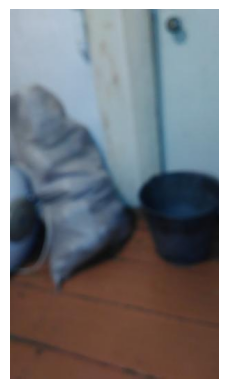

In [6]:
# Load an image from dataset
idx = 0
image, label = blur_dataset[idx]
display_image(image)

In [7]:
# Predict
pred = image_inference_service.predict_image(image)
print(f"Prediction of image with id {idx}: {pred}")  # noqa: T201
print(f"Class in model gradients: {class_names[pred['blur_gradients']]}")  # noqa: T201
print(f"Class in model laplacian: {class_names[pred['blur_laplacian']]}")  # noqa: T201

2024-12-02 20:25:49,312 - multimodal_service_logger_inference - INFO - InferencePipeline.transform_data(): Starting data transformation...
2024-12-02 20:25:49,316 - multimodal_service_logger_inference - INFO - InferencePipeline.transform_data(): Data transformed.


Prediction of image with id 0: {'blur_gradients': 1, 'blur_laplacian': 1}
Class in model gradients: blurred
Class in model laplacian: blurred


In [8]:
# Load an image from a file
image_path = DATA_PATH / pathlib.Path("kaggle_kwentar_blur_dataset/blur_dataset_resized_300/defocused_blurred/0_IPHONE-SE_F.JPG")  # noqa: E501
image = blur_dataset.load_and_prepare_image(image_path)

# Predict
pred = image_inference_service.predict_image(image)
print(f"Prediction of image loaded from path: {pred}")  # noqa: T201

2024-12-02 20:25:49,866 - multimodal_service_logger_inference - INFO - InferencePipeline.transform_data(): Starting data transformation...
2024-12-02 20:25:49,870 - multimodal_service_logger_inference - INFO - InferencePipeline.transform_data(): Data transformed.


Prediction of image loaded from path: {'blur_gradients': 1, 'blur_laplacian': 1}
